In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [14]:
class SGDRegressor(BaseEstimator):
    # you code here
    def __init__(self, eta=1e-3, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_=[]
        self.weights_=[]

    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        w = np.zeros(X.shape[1])
        for it in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):
                new_w = w.copy()
                new_w[0] += self.eta * (y[i] - w.dot(X[i, :]))
                for j in range(1, X.shape[1]):
                    new_w[j] += self.eta * (y[i] - w.dot(X[i, :])) * X[i, j]
                w = new_w.copy()
                self.weights_.append(w)
                self.mse_.append(mean_squared_error(y, X.dot(w)))

        self.w_ = self.weights_[np.argmin(self.mse_)]
        return self

    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        return np.dot(X, self.w_)

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [4]:
data_demo = pd.read_csv(DATA_PATH + "weights_heights.csv")

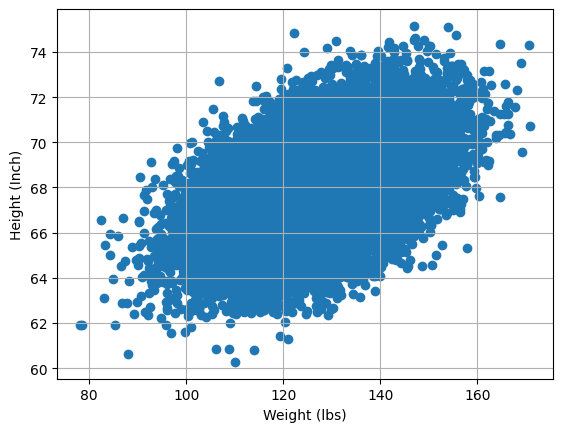

In [5]:
plt.scatter(data_demo["Weight"], data_demo["Height"])
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (Inch)")
plt.grid();

In [6]:
X, y = data_demo["Weight"].values, data_demo["Height"].values

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

In [15]:
sgd_reg = SGDRegressor(eta=0.001, n_epochs=10)
sgd_reg.fit(X_train_scaled, y_train)

100%|██████████| 10/10 [01:39<00:00,  9.91s/it]


SGDRegressor(n_epochs=10)

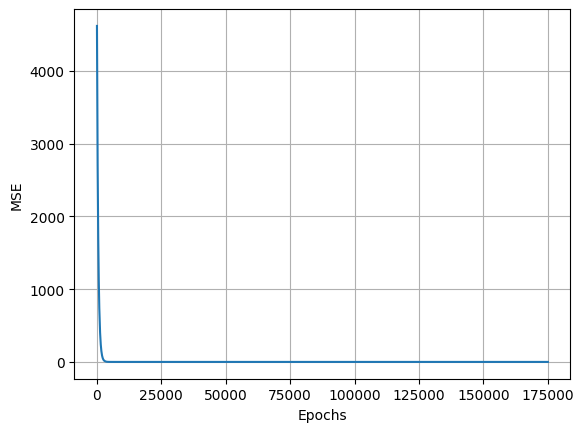

In [16]:
plt.plot(range(len(sgd_reg.mse_)), sgd_reg.mse_)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid();

In [17]:
np.min(sgd_reg.mse_), sgd_reg.w_

(2.7151352406643623, array([67.9898497 ,  0.94447605]))

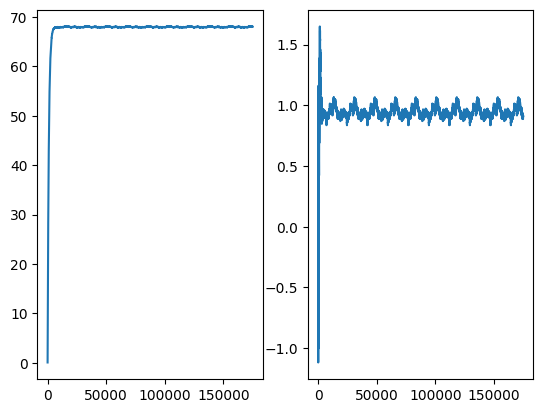

In [18]:
plt.subplot(121)
plt.plot(range(len(sgd_reg.weights_)), [w[0] for w in sgd_reg.weights_])
plt.subplot(122)
plt.plot(range(len(sgd_reg.weights_)), [w[1] for w in sgd_reg.weights_])

In [20]:
sgd_holdout_mse = mean_squared_error(y_valid, sgd_reg.predict(X_valid_scaled))
sgd_holdout_mse

2.6708681207033784

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
print(lm.coef_, lm.intercept_)
linreg_holdout_mse = mean_squared_error(y_valid, lm.predict(X_valid_scaled))
linreg_holdout_mse

[0.94537278] 67.98930834742858


2.670830767667635

In [22]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print("Correct!")
except AssertionError:
    print(
        "Something's not good.\n Linreg's holdout MSE: {}"
        "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, sgd_holdout_mse)
    )

Correct!
